#RANDOM FOREST

###EXPLORATARY DATA ANALYSIS

In [182]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [183]:
data=pd.read_excel("/content/drive/MyDrive/Assignments/Random Forest/glass data.xlsx")
data.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [184]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   Type    214 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB


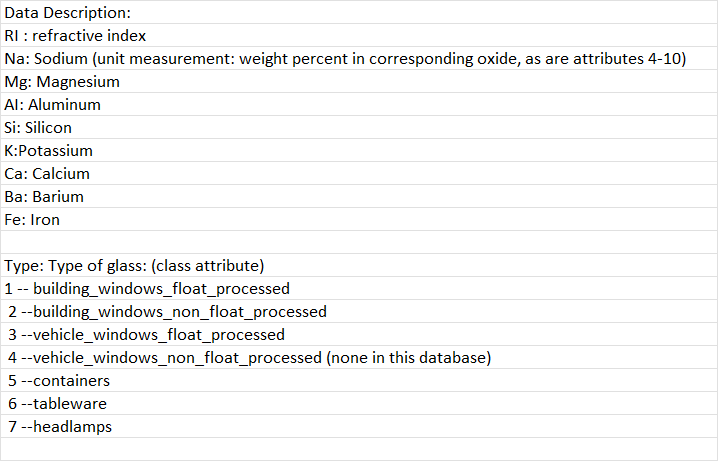

In [185]:
data.describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
std,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,2.103739
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,1.516522,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


In [186]:
data.isnull().sum()

RI      0
Na      0
Mg      0
Al      0
Si      0
K       0
Ca      0
Ba      0
Fe      0
Type    0
dtype: int64

- No null values in the data set


In [187]:
data[data.duplicated(keep=False)]

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
38,1.52213,14.21,3.82,0.47,71.77,0.11,9.57,0.0,0.0,1
39,1.52213,14.21,3.82,0.47,71.77,0.11,9.57,0.0,0.0,1


- there is one duplicate value in the dataset and we are gonna remove.
- The impact of removing a single entry on the model's performance is generally minimal, especially with a relatively small dataset like this.

In [188]:
data1=data.drop_duplicates()
data1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 213 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      213 non-null    float64
 1   Na      213 non-null    float64
 2   Mg      213 non-null    float64
 3   Al      213 non-null    float64
 4   Si      213 non-null    float64
 5   K       213 non-null    float64
 6   Ca      213 non-null    float64
 7   Ba      213 non-null    float64
 8   Fe      213 non-null    float64
 9   Type    213 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 18.3 KB


In [189]:
data1[data1.duplicated(keep=False)]

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type


- Duplicate values were succesfully removed

In [190]:
data1.skew()

RI      1.648017
Na      0.465699
Mg     -1.146096
Al      0.938402
Si     -0.744646
K       6.545429
Ca      2.050752
Ba      3.406749
Fe      1.747173
Type    1.108861
dtype: float64

- This shows how the data in each attribute is skewed and the attribute K(potassium) is the highest skewed and it is right skewed followed by Ba and then by ca and continues

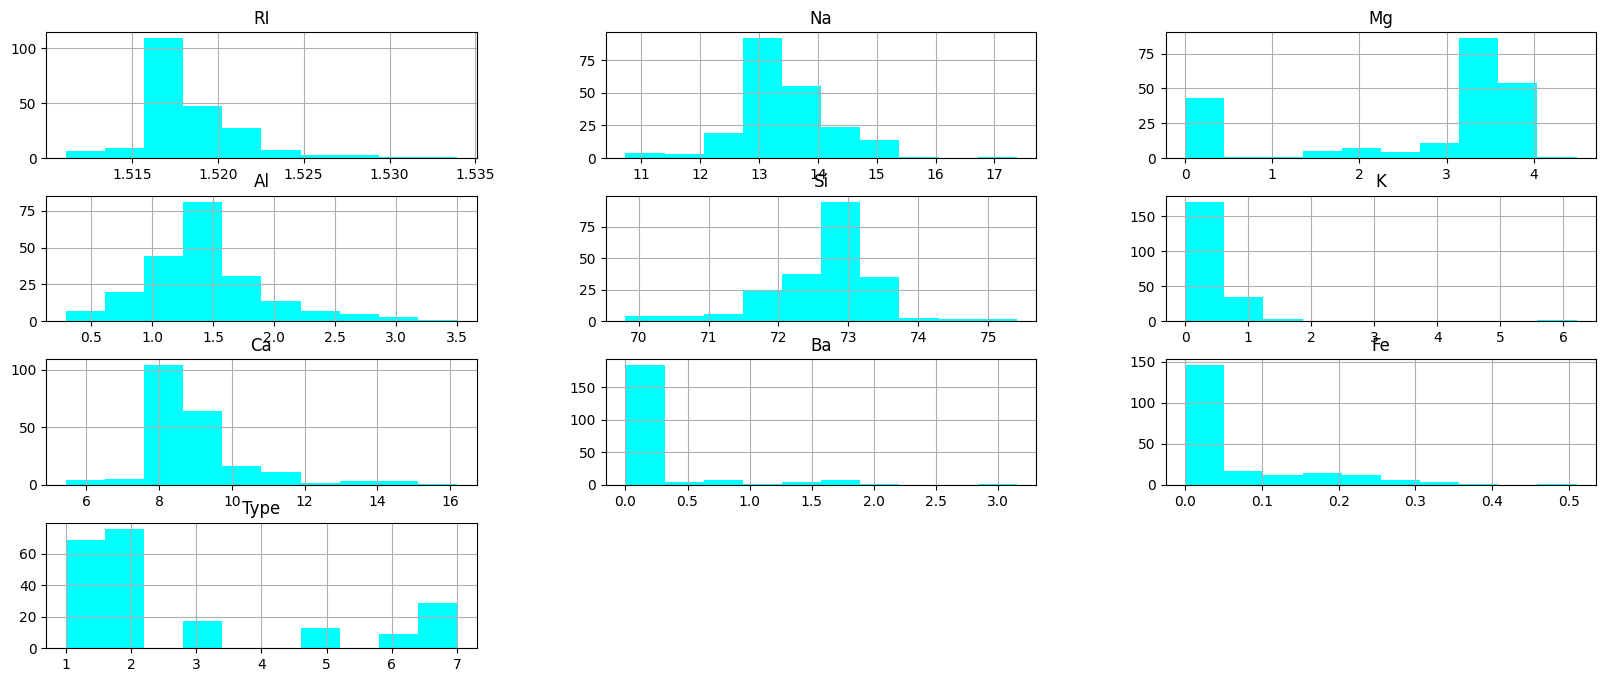

In [191]:
data1.hist(figsize=(20,8),color="cyan")
plt.title("Histograms for the dataset")
plt.show()

- the histograms give away the distribution of the data let's also see the density plot distribution

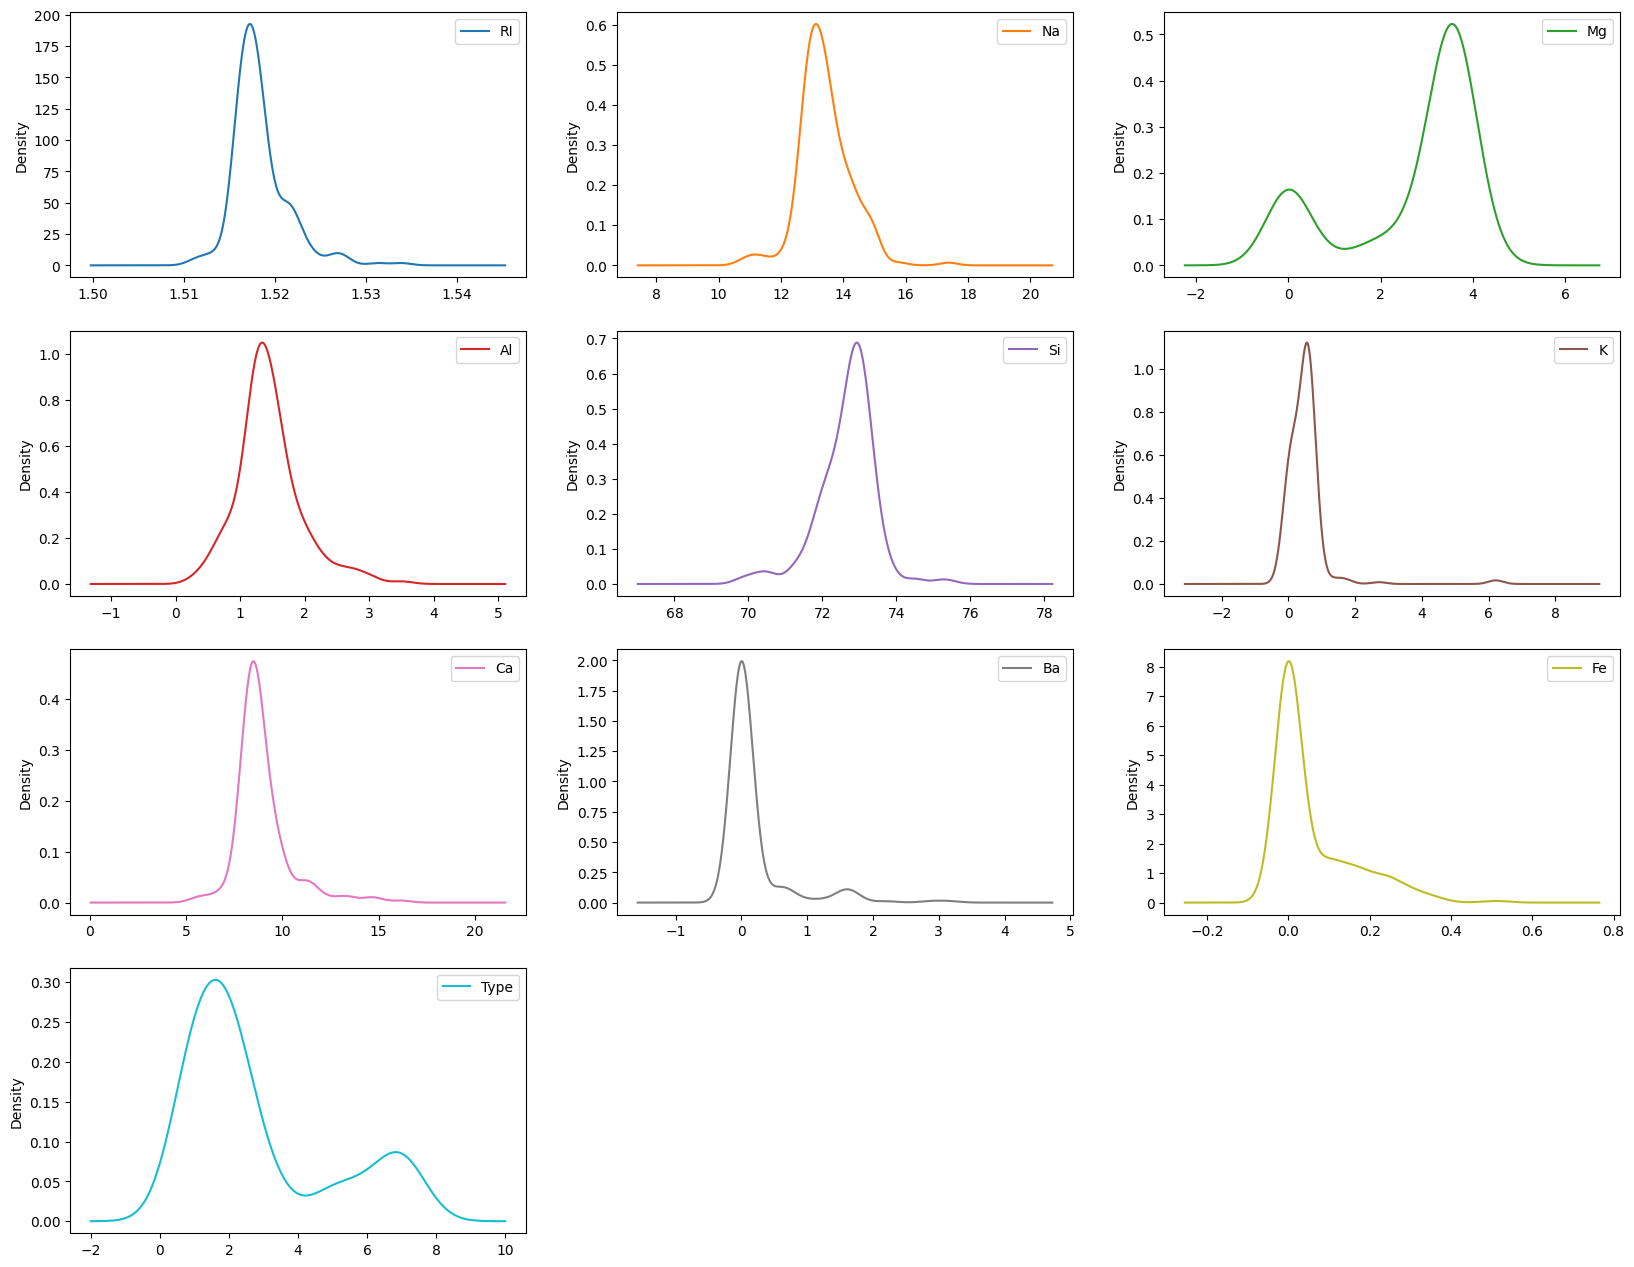

In [192]:
data1.plot(kind='density', subplots=True, layout=(5, 3), figsize=(20, 20), sharex=False)
plt.title("The KDE Plots for the data attributes")
plt.show()

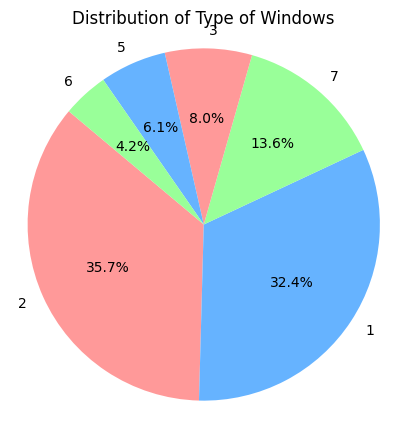

In [193]:
# Let's PLot the pie chart to get te percentage of different types present in the dataset
num_counts = data1['Type'].value_counts()

# Plot the pie chart
plt.figure(figsize=(5,5))
plt.pie(num_counts, labels=num_counts.index, autopct='%1.1f%%', startangle=140, colors=['#ff9999','#66b3ff','#99ff99'])
plt.title('Distribution of Type of Windows')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

- The Pie Chart reveals that the data has
  - 32.45 of type 1 windows glass
  - 35.7% of type 2 windows glass
  - 8.0% of type 3 windows glass
  - 6.1% of type 5 windows glass
  - 4.25 of type 6 windows glass
  - 13.6 % of type 7 windows glass

- the data description shows us that there are 7 types of glass for the windows and in the given dataset the type 4 glass no match , so there is no mislabeling of the data

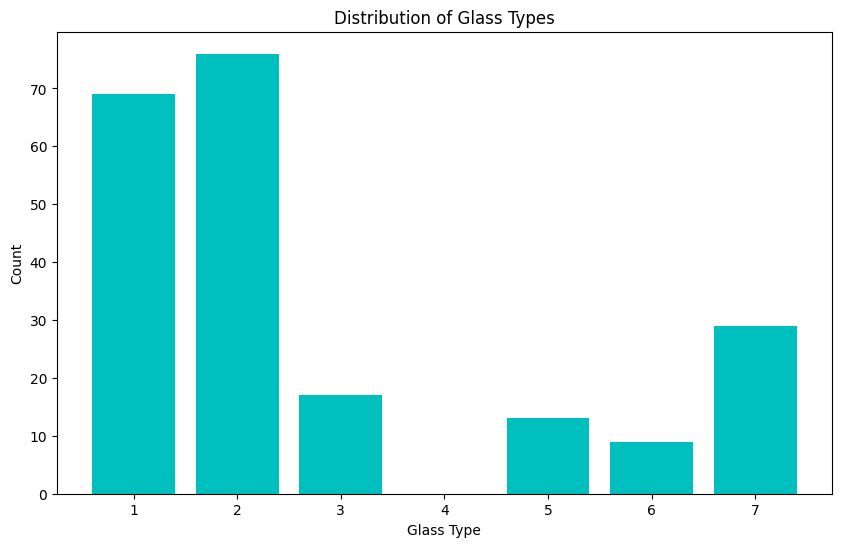

In [194]:
# Bar chart for the 'Type' column
type_counts = data1['Type'].value_counts()

plt.figure(figsize=(10, 6))
plt.bar(type_counts.index, type_counts.values, color='c')

# Add labels and title
plt.xlabel('Glass Type')
plt.ylabel('Count')
plt.title('Distribution of Glass Types')

# Show the plot
plt.show()

In [195]:
data1.corr()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
RI,1.000000,-0.198802,-0.127526,-0.400973,-0.539000,-0.287645,0.811183,0.001679,0.147083,-0.160140
Na,-0.198802,1.000000,-0.278420,0.167735,-0.064885,-0.264158,-0.278194,0.329080,-0.239374,0.508837
Mg,-0.127526,-0.278420,1.000000,-0.479575,-0.162437,0.007617,-0.446197,-0.491818,0.085426,-0.744195
Al,-0.400973,0.167735,-0.479575,1.000000,-0.016195,0.323683,-0.258068,0.480642,-0.080583,0.597432
Si,-0.539000,-0.064885,-0.162437,-0.016195,1.000000,-0.197281,-0.207145,-0.104389,-0.097717,0.147725
K,-0.287645,-0.264158,0.007617,0.323683,-0.197281,1.000000,-0.317032,-0.043653,-0.009372,-0.012455
Ca,0.811183,-0.278194,-0.446197,-0.258068,-0.207145,-0.317032,1.000000,-0.112208,0.126314,0.002677
Ba,0.001679,0.329080,-0.491818,0.480642,-0.104389,-0.043653,-0.112208,1.000000,-0.059729,0.574896
Fe,0.147083,-0.239374,0.085426,-0.080583,-0.097717,-0.009372,0.126314,-0.059729,1.000000,-0.191090
Type,-0.160140,0.508837,-0.744195,0.597432,0.147725,-0.012455,0.002677,0.574896,-0.191090,1.000000


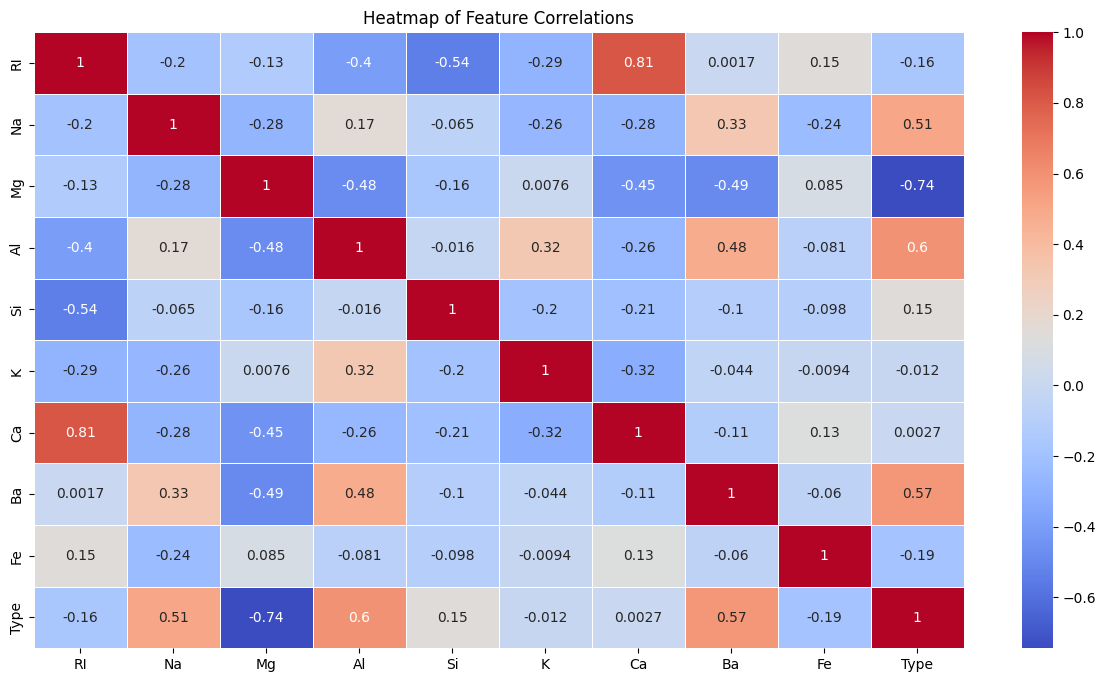

In [196]:
correlation_matrix=data1.corr()

# Create the heatmap
plt.figure(figsize=(15, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Heatmap of Feature Correlations')
plt.show()

Insights on the heatmap for correlation matrix:
- aluminium has a moderate negative relation with both RI[Refractive index and magnesium]
- Silicon has moderate negative relation with RI
- K[Potassium] less moderate negative relation wit both RI and Sodium[Na] and a average positive correlation with Aluminium[Al]
- Calcium has a strong positive relation with RI and less negative relation with Na, Mg, Al
- Barium has average positive relation with Na and Al and same level negative relation with Mg
- Fe has very low positive correlation with RI and Ca and low negative relation with Na
- Type has a strong negative correlation with Mg and some  pretty strong correlations with Na, Al and Ba

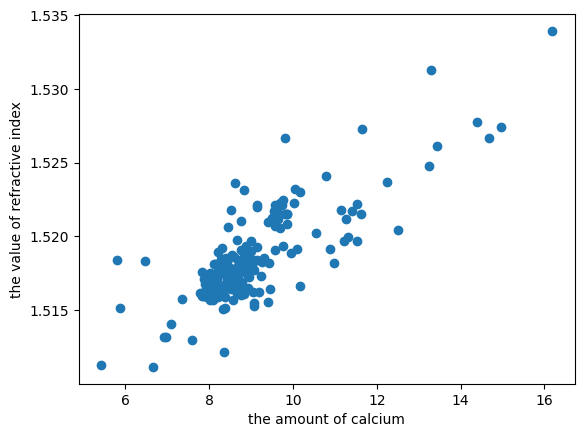

In [197]:
plt.scatter(x="Ca",y="RI", data=data1)
plt.xlabel("the amount of calcium")
plt.ylabel("the value of refractive index")
plt.show()

- This definitely indicates a positive correlation and not much of heteroskadasticity in the distribution of the data through-out te scatter plot

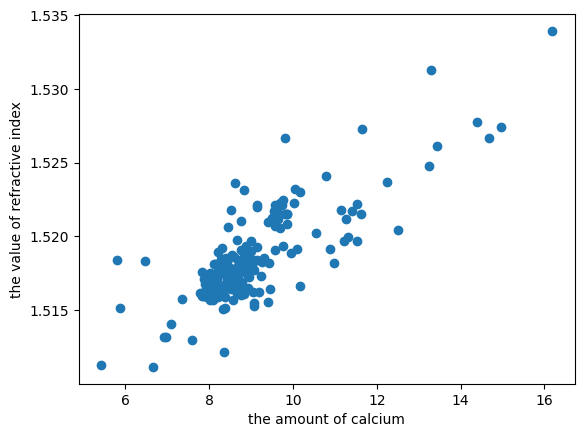

In [198]:
plt.scatter(x="Ca",y="RI", data=data1)
plt.xlabel("the amount of calcium")
plt.ylabel("the value of refractive index")
plt.show()

<Axes: >

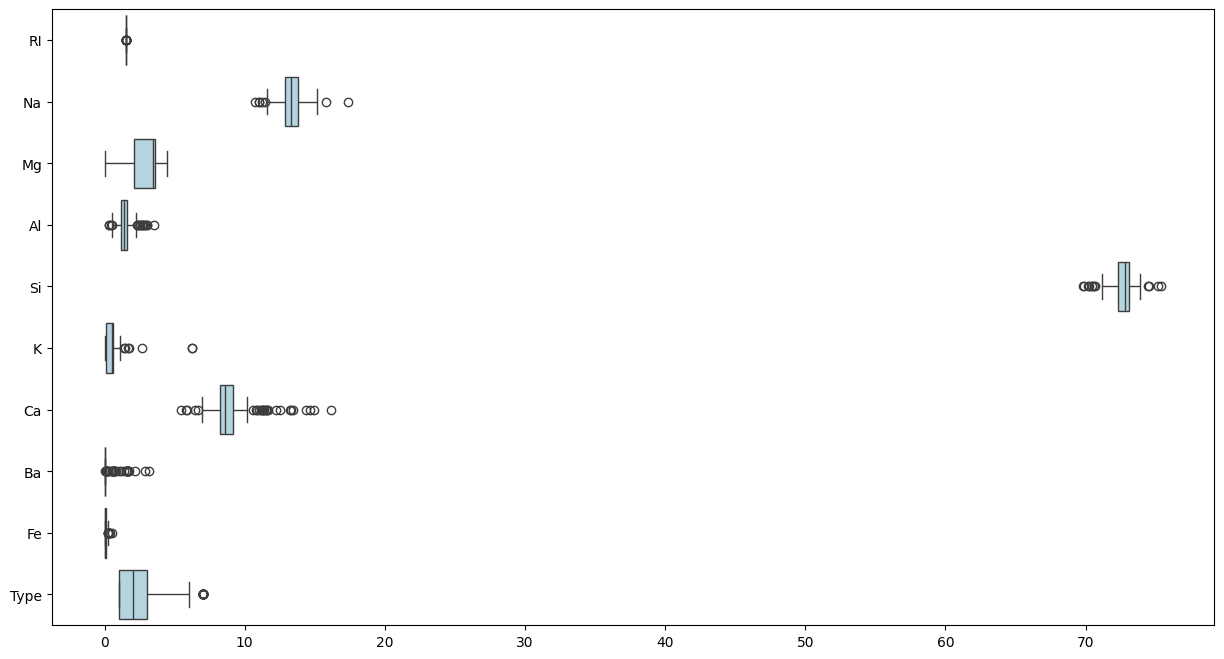

In [199]:
plt.figure(figsize=(15,8))
sns.boxplot(data=data1, orient="h", color="lightblue")

- Box Plot shows us that there are outlier based on its calculations but removing the outliers will be a in significant option as the data is already less and removing makes it even small and the it isnt suitable for model building

- There are no missing values to handle and no categorical variables to encode so we are moving towards the transformation of the data either standardize it , normalize it or apply transformations like log

In [200]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Select numerical features
numerical_features = data1.select_dtypes(include=['int64', 'float64']).columns

# Apply Standard Scaling
scaler_standard = StandardScaler()
data1_standard_scaled = data1.copy()
data1_standard_scaled[numerical_features] = scaler_standard.fit_transform(data1[numerical_features])

# Display the first few rows of the scaled datasets
#df_standard_scaled_head
data1_standard_scaled.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,0.879840,0.289558,1.257238,-0.706370,-1.133248,-0.673480,-0.143466,-0.353808,-0.588301,-0.851703
1,-0.243816,0.596403,0.639311,-0.180863,0.097037,-0.028962,-0.790201,-0.353808,-0.588301,-0.851703
2,-0.716412,0.154546,0.604596,0.182950,0.433746,-0.167073,-0.825349,-0.353808,-0.588301,-0.851703
3,-0.227291,-0.238216,0.701798,-0.322346,-0.058368,0.109149,-0.516041,-0.353808,-0.588301,-0.851703
4,-0.306608,-0.164573,0.653197,-0.423405,0.550299,0.078457,-0.621487,-0.353808,-0.588301,-0.851703


In [201]:
data1_standard_scaled.skew()

RI      1.648017
Na      0.465699
Mg     -1.146096
Al      0.938402
Si     -0.744646
K       6.545429
Ca      2.050752
Ba      3.406749
Fe      1.747173
Type    1.108861
dtype: float64

In [202]:
# Apply Min-Max Scaling
scaler_min_max = MinMaxScaler()
data1_min_max_scaled = data1.copy()
data1_min_max_scaled[numerical_features] = scaler_min_max.fit_transform(data1[numerical_features])

#df_min_max_scaled_head =
data1_min_max_scaled.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,0.432836,0.437594,1.000000,0.252336,0.351786,0.009662,0.308550,0.0,0.0,0.0
1,0.283582,0.475188,0.801782,0.333333,0.521429,0.077295,0.223048,0.0,0.0,0.0
2,0.220808,0.421053,0.790646,0.389408,0.567857,0.062802,0.218401,0.0,0.0,0.0
3,0.285777,0.372932,0.821826,0.311526,0.500000,0.091787,0.259294,0.0,0.0,0.0
4,0.275241,0.381955,0.806236,0.295950,0.583929,0.088567,0.245353,0.0,0.0,0.0


In [203]:
data1_min_max_scaled.info()

<class 'pandas.core.frame.DataFrame'>
Index: 213 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      213 non-null    float64
 1   Na      213 non-null    float64
 2   Mg      213 non-null    float64
 3   Al      213 non-null    float64
 4   Si      213 non-null    float64
 5   K       213 non-null    float64
 6   Ca      213 non-null    float64
 7   Ba      213 non-null    float64
 8   Fe      213 non-null    float64
 9   Type    213 non-null    float64
dtypes: float64(10)
memory usage: 18.3 KB


In [204]:
data1_min_max_scaled.skew()

RI      1.648017
Na      0.465699
Mg     -1.146096
Al      0.938402
Si     -0.744646
K       6.545429
Ca      2.050752
Ba      3.406749
Fe      1.747173
Type    1.108861
dtype: float64

let's appply Log transformation as most of them are right skewed data

In [205]:
# Identify skewed features
skewed_features = data1.select_dtypes(include=['number']).apply(lambda x: x.skew()).sort_values(ascending=False)

# Apply log transformation to the most skewed feature
skewed_feature = skewed_features.index[0]
data1[skewed_feature + '_log'] = np.log1p(data1[skewed_feature])

In [206]:
skewed_feature_1 = skewed_features.index[1]
data1[skewed_feature_1 + '_log'] = np.log1p(data1[skewed_feature_1])

In [207]:
skewed_feature_2 = skewed_features.index[2]
data1[skewed_feature_2 + '_log'] = np.log1p(data1[skewed_feature_2])

In [208]:
skewed_feature_3 = skewed_features.index[3]
data1[skewed_feature_3 + '_log'] = np.log1p(data1[skewed_feature_3])

In [209]:
skewed_feature_4 = skewed_features.index[4]
data1[skewed_feature_4 + '_log'] = np.log1p(data1[skewed_feature_4])

In [210]:
skewed_feature_6 = skewed_features.index[6]
data1[skewed_feature_6 + '_log'] = np.log1p(data1[skewed_feature_6])

In [211]:
#skewed_feature_last = skewed_features.index[-1]
#data1[skewed_feature_last + '_log'] = np.log1p(data1[skewed_feature_last])
#doing this will increase its negative skewness so we dont do log transformation for negative numbers

In [212]:
data1.skew()

RI        1.648017
Na        0.465699
Mg       -1.146096
Al        0.938402
Si       -0.744646
K         6.545429
Ca        2.050752
Ba        3.406749
Fe        1.747173
Type      1.108861
K_log     1.976061
Ba_log    2.718048
Ca_log    1.174837
Fe_log    1.579247
RI_log    1.640383
Al_log    0.034187
dtype: float64

In [213]:
data1.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type,K_log,Ba_log,Ca_log,Fe_log,RI_log,Al_log
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1,0.058269,0.0,2.277267,0.0,0.924660,0.741937
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1,0.392042,0.0,2.178155,0.0,0.923310,0.858662
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1,0.329304,0.0,2.172476,0.0,0.922742,0.932164
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1,0.451076,0.0,2.221375,0.0,0.923330,0.828552
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1,0.438255,0.0,2.204972,0.0,0.923235,0.806476


In [214]:
glass=data1.copy()

In [215]:
# Drop specific columns
columns_to_drop = ['Ca', 'Ba', 'Al', 'K', 'Fe']
glass_data = glass.drop(columns=columns_to_drop)

In [216]:
# Display the first few rows of the modified dataset
glass_data.head()

,RI,Na,Mg,Si,Type,K_log,Ba_log,Ca_log,Fe_log,RI_log,Al_log
0,1.52101,13.64,4.49,71.78,1,0.058269,0.0,2.277267,0.0,0.924660,0.741937
1,1.51761,13.89,3.60,72.73,1,0.392042,0.0,2.178155,0.0,0.923310,0.858662
2,1.51618,13.53,3.55,72.99,1,0.329304,0.0,2.172476,0.0,0.922742,0.932164
3,1.51766,13.21,3.69,72.61,1,0.451076,0.0,2.221375,0.0,0.923330,0.828552
4,1.51742,13.27,3.62,73.08,1,0.438255,0.0,2.204972,0.0,0.923235,0.806476


In [217]:
# Identify the target column
target_column = 'Type'

# Reorder the columns
columns = list(glass_data.columns)
columns.remove(target_column)
columns.append(target_column)

# Reassign the DataFrame with the reordered columns
glass_data_reordered = glass_data[columns]

# Display the first few rows of the modified dataset
glass_data_reordered.head()

,RI,Na,Mg,Si,K_log,Ba_log,Ca_log,Fe_log,RI_log,Al_log,Type
0,1.52101,13.64,4.49,71.78,0.058269,0.0,2.277267,0.0,0.924660,0.741937,1
1,1.51761,13.89,3.60,72.73,0.392042,0.0,2.178155,0.0,0.923310,0.858662,1
2,1.51618,13.53,3.55,72.99,0.329304,0.0,2.172476,0.0,0.922742,0.932164,1
3,1.51766,13.21,3.69,72.61,0.451076,0.0,2.221375,0.0,0.923330,0.828552,1
4,1.51742,13.27,3.62,73.08,0.438255,0.0,2.204972,0.0,0.923235,0.806476,1


In [218]:
final_data=glass_data_reordered.copy()

In [219]:
final_data.info(0)

<class 'pandas.core.frame.DataFrame'>
Index: 213 entries, 0 to 213
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      213 non-null    float64
 1   Na      213 non-null    float64
 2   Mg      213 non-null    float64
 3   Si      213 non-null    float64
 4   K_log   213 non-null    float64
 5   Ba_log  213 non-null    float64
 6   Ca_log  213 non-null    float64
 7   Fe_log  213 non-null    float64
 8   RI_log  213 non-null    float64
 9   Al_log  213 non-null    float64
 10  Type    213 non-null    int64  
dtypes: float64(10), int64(1)
memory usage: 20.0 KB


### RANDOM FOREST IMPLEMENTATION

In [220]:
from sklearn.model_selection import train_test_split

X = final_data.drop('Type', axis=1)
y = final_data['Type']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [221]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [222]:
# Instantiate the model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

# Predictions
y_pred = rf_model.predict(X_test)

In [223]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1-Score: {f1}')

Accuracy: 0.7906976744186046
Precision: 0.8024373881932022
Recall: 0.7906976744186046
F1-Score: 0.7864142666101308


**BAGGING AND BOOSTING METHODS**

- Explanation
  - **Bagging (Bootstrap Aggregating)** involves training multiple models on different subsets of the data and averaging their predictions to improve stability and accuracy.
  - **Boosting** involves training models sequentially, where each new model attempts to correct the errors of the previous ones. This often leads to improved performance but can be more prone to overfitting.



- Bagging: It reduces variance by averaging multiple models trained on different subsets of the data. Each model is trained independently.
- Boosting: It reduces bias by training models sequentially, with each new model focusing on the errors of the previous models. This can lead to a more accurate model but also increases the risk of overfitting.

#### Bagging by Random Forest

In [224]:
from sklearn.ensemble import BaggingClassifier

# Bagging with Random Forest
bagging_model = BaggingClassifier(base_estimator=RandomForestClassifier(n_estimators=100, random_state=42), n_estimators=10, random_state=42)
bagging_model.fit(X_train, y_train)

BaggingClassifier(base_estimator=RandomForestClassifier(random_state=42),
                  random_state=42)

In [225]:
# Predictions
y_pred_bagging = bagging_model.predict(X_test)

In [226]:
# Evaluate the model
accuracy_bagging = accuracy_score(y_test, y_pred_bagging)
precision_bagging = precision_score(y_test, y_pred_bagging, average='weighted')
recall_bagging = recall_score(y_test, y_pred_bagging, average='weighted')
f1_bagging = f1_score(y_test, y_pred_bagging, average='weighted')

print(f'Bagging - Accuracy: {accuracy_bagging}')
print(f'Bagging - Precision: {precision_bagging}')
print(f'Bagging - Recall: {recall_bagging}')
print(f'Bagging - F1-Score: {f1_bagging}')

Bagging - Accuracy: 0.7674418604651163
Bagging - Precision: 0.762953896368829
Bagging - Recall: 0.7674418604651163
Bagging - F1-Score: 0.7524219624424823


#### Boosting by Ada-Boost

In [227]:
from sklearn.ensemble import AdaBoostClassifier

# Boosting with AdaBoost
boosting_model = AdaBoostClassifier(n_estimators=100, random_state=42)
boosting_model.fit(X_train, y_train)

AdaBoostClassifier(n_estimators=100, random_state=42)

In [228]:
# Predictions
y_pred_boosting = boosting_model.predict(X_test)

In [229]:
# Evaluate the model
accuracy_boosting = accuracy_score(y_test, y_pred_boosting)
precision_boosting = precision_score(y_test, y_pred_boosting, average='weighted')
recall_boosting = recall_score(y_test, y_pred_boosting, average='weighted')
f1_boosting = f1_score(y_test, y_pred_boosting, average='weighted')

print(f'Boosting - Accuracy: {accuracy_boosting}')
print(f'Boosting - Precision: {precision_boosting}')
print(f'Boosting - Recall: {recall_boosting}')
print(f'Boosting - F1-Score: {f1_boosting}')

Boosting - Accuracy: 0.4186046511627907
Boosting - Precision: 0.3821705426356589
Boosting - Recall: 0.4186046511627907
Boosting - F1-Score: 0.36378737541528244


**Handling Imbalanced Data**

To handle imbalanced data, techniques such as resampling (oversampling the minority class or undersampling the majority class), using different evaluation metrics (like ROC-AUC), or applying algorithms designed for imbalanced data (such as SMOTE) can be used.

In [230]:
from imblearn.over_sampling import SMOTE

# Apply SMOTE to the training data
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

In [231]:
# Train the model on resampled data
rf_model.fit(X_train_res, y_train_res)

# Predictions on the original test set
y_pred_res = rf_model.predict(X_test)

In [232]:
# Evaluate the model
accuracy_res = accuracy_score(y_test, y_pred_res)
precision_res = precision_score(y_test, y_pred_res, average='weighted')
recall_res = recall_score(y_test, y_pred_res, average='weighted')
f1_res = f1_score(y_test, y_pred_res, average='weighted')

print(f'SMOTE - Accuracy: {accuracy_res}')
print(f'SMOTE - Precision: {precision_res}')
print(f'SMOTE - Recall: {recall_res}')
print(f'SMOTE - F1-Score: {f1_res}')


SMOTE - Accuracy: 0.7906976744186046
SMOTE - Precision: 0.8028541226215645
SMOTE - Recall: 0.7906976744186046
SMOTE - F1-Score: 0.792220376522702


#### Comparing the Results

In [233]:
import pandas as pd
from tabulate import tabulate

# Assuming you have these variables defined with your model evaluation metrics
#accuracy = 0.90
#precision = 0.88
#recall = 0.85
#f1 = 0.86

#accuracy_bagging = 0.91
#precision_bagging = 0.89
#recall_bagging = 0.86
#f1_bagging = 0.87

#accuracy_boosting = 0.92
#precision_boosting = 0.90
#recall_boosting = 0.87
#f1_boosting = 0.88

# Create a dictionary with the data
data = {
    "Metric": ["Accuracy", "Precision", "Recall", "F1-Score"],
    "Random Forest": [accuracy, precision, recall, f1],
    "Bagging": [accuracy_bagging, precision_bagging, recall_bagging, f1_bagging],
    "Boosting": [accuracy_boosting, precision_boosting, recall_boosting, f1_boosting],
    "SMOTE":[accuracy_res,precision_res,recall_res,f1_res]
}

# Convert dictionary to a DataFrame
df = pd.DataFrame(data)

# Print the DataFrame as a table
print(tabulate(df, headers='keys', tablefmt='grid'))


+----+-----------+-----------------+-----------+------------+----------+
|    | Metric    |   Random Forest |   Bagging |   Boosting |    SMOTE |
+====+===========+=================+===========+============+==========+
|  0 | Accuracy  |        0.790698 |  0.767442 |   0.418605 | 0.790698 |
+----+-----------+-----------------+-----------+------------+----------+
|  1 | Precision |        0.802437 |  0.762954 |   0.382171 | 0.802854 |
+----+-----------+-----------------+-----------+------------+----------+
|  2 | Recall    |        0.790698 |  0.767442 |   0.418605 | 0.790698 |
+----+-----------+-----------------+-----------+------------+----------+
|  3 | F1-Score  |        0.786414 |  0.752422 |   0.363787 | 0.79222  |
+----+-----------+-----------------+-----------+------------+----------+


- The Random Forest Evaluation Metrics are actually pretty good than Bagging and far more greater than Boosting
- well SMOTE method Evaluation Metrics are leading in precision and F1-Score with very slight values